<a href="https://colab.research.google.com/github/Ale2497/desihigh/blob/master/cosmoClass_lcdm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#uncomment to get 
%matplotlib inline
import matplotlib.pyplot as plt
from math import pi
import seaborn as sns

import numpy as np

In [12]:
%%shell

git clone https://github.com/lesgourg/class_public.git

fatal: destination path 'class_public' already exists and is not an empty directory.


CalledProcessError: ignored

In [13]:
    from google.colab import drive
    from google.colab import files

    drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
%%shell 

cd class_public/
make 

cp python/setup.py python/autosetup.py
cd python; export CC=gcc; python autosetup.py install || python autosetup.py install --user
running install
running build
running build_ext
skipping '/content/class_public/python/../python/classy.c' Cython extension (up-to-date)
running install_lib
running install_egg_info
Removing /usr/local/lib/python3.9/dist-packages/classy-3.2.0.egg-info
Writing /usr/local/lib/python3.9/dist-packages/classy-3.2.0.egg-info
rm python/autosetup.py


In [15]:
#Descargar datos del espectro de potencias de Planck
%%shell
wget -O COM_PowerSpect_CMB-TT-binned_R3.01.txt "http://pla.esac.esa.int/pla/aio/product-action?COSMOLOGY.FILE_ID=COM_PowerSpect_CMB-TT-binned_R3.01.txt"

--2023-04-18 00:09:51--  http://pla.esac.esa.int/pla/aio/product-action?COSMOLOGY.FILE_ID=COM_PowerSpect_CMB-TT-binned_R3.01.txt
Resolving pla.esac.esa.int (pla.esac.esa.int)... 193.147.153.153
Connecting to pla.esac.esa.int (pla.esac.esa.int)|193.147.153.153|:80... connected.
HTTP request sent, awaiting response... 200 
Length: 7143 (7.0K) [application/x-binary]
Saving to: ‘COM_PowerSpect_CMB-TT-binned_R3.01.txt’

COM_PowerSpect_CMB- 100%[===================>]   6.98K  --.-KB/s    in 0s      

2023-04-18 00:09:52 (611 MB/s) - ‘COM_PowerSpect_CMB-TT-binned_R3.01.txt’ saved [7143/7143]



#Crear el data frame desde el archivo txt proporcionado por los creadores de CLASS


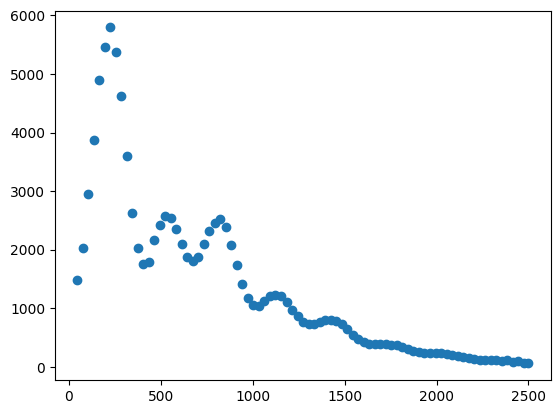

In [16]:
data=np.loadtxt("/content/COM_PowerSpect_CMB-TT-binned_R3.01.txt").T
plt.scatter(data[0],data[1])

#Se importa la libreria de Class como cualquier otra libreria y se le asigna un alias


In [20]:
#Importar libreria class
from classy import Class

A continuación se inicializa la clase con un objeto llamado LambdaCDM de tipo Class, se le dan los parametros cosmologicos necesarios y se realizan las operaciones necesarias


In [277]:
# Inicializar la clase "Class"
LambdaCDM = Class()
# dar parametros cosmologicos

LambdaCDM.set({'omega_b':0.0223828,'omega_cdm':0.25,'h':0.67810,'A_s':3.00549e-09,'n_s':0.9660499,'tau_reio':0.05430842})
LambdaCDM.set({'output':'tCl,pCl,lCl,mPk','lensing':'yes','P_k_max_1/Mpc':3.0})
# ejecutar class
LambdaCDM.compute()

#se obtienen los coeficientes cl mediante una funcion lensed_cl que es parte de la clase class

In [278]:
# Obtener los coeficientes Cl
cls = LambdaCDM.lensed_cl(2500)
# checar el formato
cls.keys()

dict_keys(['tt', 'ee', 'te', 'bb', 'pp', 'tp', 'ell'])

#Se asignan valores del arreglo cls a ll y a clTT a partir del segundo elemento 

In [279]:
ll = cls['ell'][2:]
clTT = cls['tt'][2:]

Se grafican los resultados del programa(linea continua) y se comparan con los datos del archivo inicial del data frame(lina punteada)

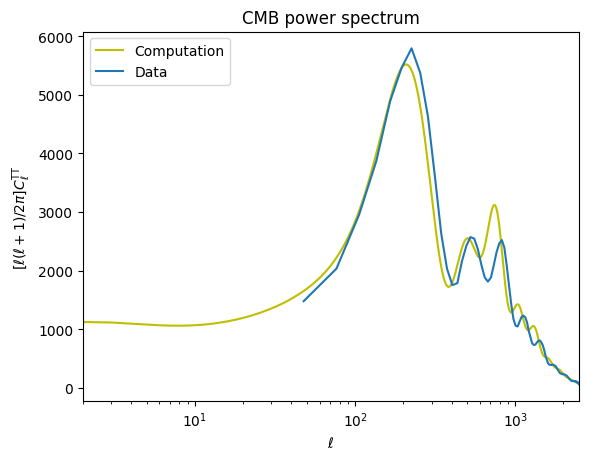

In [280]:
# plot C_l^TT
plt.figure(1)
plt.title('CMB power spectrum')
plt.xscale('log');plt.yscale('linear');plt.xlim(2,2500)
plt.xlabel(r'$\ell$')
plt.ylabel(r'$[\ell(\ell+1)/2\pi]  C_\ell^\mathrm{TT}$')
plt.plot(ll,clTT*ll*(ll+1)/2./pi*1e12*2.7225**2,'y-')
plt.plot(data[0],data[1])
plt.legend(["Computation","Data" ], loc ="upper left")


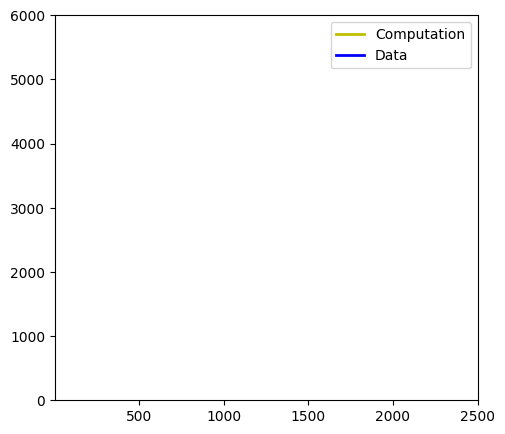

In [222]:
#create a figure and axes
fig = plt.figure(figsize=(12,5))
ax1 = plt.subplot(1,2,1)

#set up the subplots as needed
ax1.set_xlim((2,2500))
ax1.set_ylim((0,6000))

#create object that will change in the animation. These are
#initially empty, and will be given new values for each frame
#in the animation
txt_title = ax1.set_title('')
line1, = ax1.plot([],[], 'y',lw=2)
line2, = ax1.plot([],[], 'b',lw=2)
 
ax1.legend(['Computation','Data']);

In [223]:
 # Inicializar la clase nueva para animacion "Class"
LambdaCDM1 = Class()
 # dar parametros cosmologicos 
LambdaCDM1.set({'omega_b':0.0223828,'omega_cdm':0.201075,'h':0.67810,'A_s':3.00549e-09,'n_s':0.9660499,'tau_reio':0.05430842})
LambdaCDM1.set({'output':'tCl,pCl,lCl,mPk','lensing':'yes','P_k_max_1/Mpc':3.0})
# ejecutar class
LambdaCDM1.compute()

  # Obtener los coeficientes Cl
cls1 = LambdaCDM1.lensed_cl(2500)
  
  # checar el formato
cls1.keys()

ll_ = cls1['ell'][2:]
clTT_ = cls1['tt'][2:]

In [92]:
#Funcion para la animacion que se llama secuencialmente para cada fram
def drawframe(n):
 
  x1 = ll_
  y1 = clTT_*ll_*(ll_+1)/2./pi*1e12*2.7225**2
  x2 = data[0]
  y2 = data[1]
  line1.set_data(x1,y1)
  line2.set_data(x2,y2)
  txt_title.set_text('Frame ={0:4d}'.format(n))
  
  return(line1,line2)

In [93]:
from matplotlib import animation

#blit = True regraficar solamente las partes que han cambiado
anim = animation.FuncAnimation(fig, drawframe, frames = 100,interval =20, blit = True)

In [94]:
from IPython.display import HTML
HTML(anim.to_html5_video())

#####Como se puede ver la grafica no cambia aun cuando se esta haciendo una animacion frame por frame ya que no pude encontrar la manera de actualizar los valores para los parametros automaticamente al momento de llamar la funcion de animacion. intente poner la incializacion de la clase lambdacdm1 y los parametros dentro de la funcion,pero no tuve excito.

***Espectro de potencias de Materia***


In [232]:
# get P(k) at redhsift z=0
import numpy as np
kk = np.logspace(-4,np.log10(3),1000) # k in h/Mpc
Pk = [] # P(k) in (Mpc/h)**3
h = LambdaCDM.h() # get reduced Hubble for conversions to 1/Mpc
for k in kk:
    Pk.append(LambdaCDM.pk(k*h,0.)*h**3) # function .pk(k,z)

#Se asignan los datos de archivos txt del espectro de potencias a dos data frames distintos 



In [233]:
pk_data = np.loadtxt("/content/pk_data").T
pk_data_cmb = np.loadtxt("/content/pk_data_cmb").T

#Se grafican los data frames y se comparan

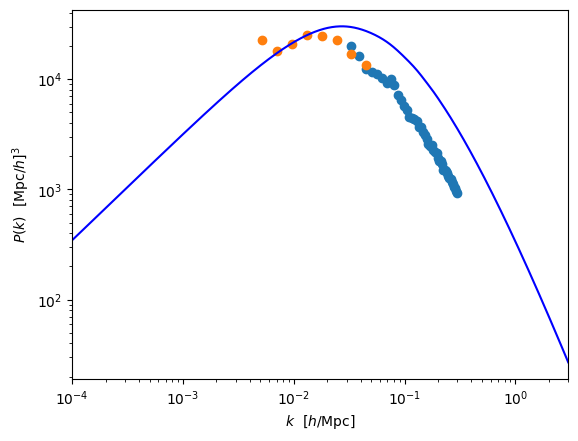

In [234]:
#plot P(k)
plt.figure(2)
plt.xscale('log');plt.yscale('log'); plt.xlim(kk[0],kk[-1])
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
plt.plot(kk,Pk,'b-')
plt.scatter(pk_data[0],pk_data[1])
plt.scatter(pk_data_cmb[0],pk_data_cmb[1])

  

#Se hace un ajuste a los resultados 

(0.003, 1)

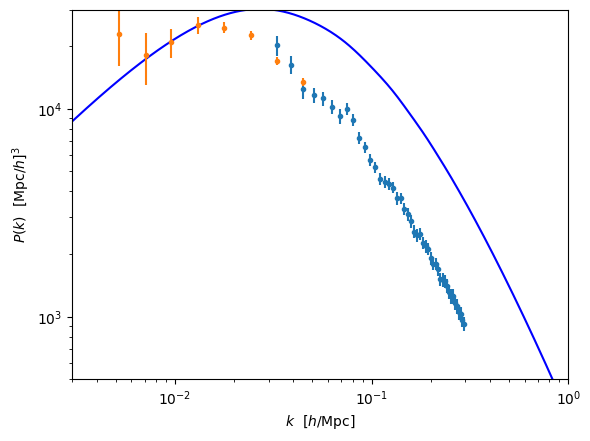

In [235]:
# plot P(k)
plt.figure(2)
plt.xscale('log');plt.yscale('log');plt.xlim(kk[0],kk[-1])
plt.xlabel(r'$k \,\,\,\, [h/\mathrm{Mpc}]$')
plt.ylabel(r'$P(k) \,\,\,\, [\mathrm{Mpc}/h]^3$')
plt.plot(kk,Pk,'b-')
plt.errorbar(pk_data[0],pk_data[1],pk_data[2],fmt='.')
plt.errorbar(pk_data_cmb[0],pk_data_cmb[1],yerr=pk_data_cmb[2]-pk_data_cmb[1],fmt='.')
plt.ylim(5e2,3e4)
plt.xlim(3e-3,1)